<a href="https://colab.research.google.com/github/Nekoiii/ML_Practices_colab/blob/main/Rola_test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

参考文章：https://note.com/npaka/n/ndb287a48b682

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/MyDrive/ML_Practices/Lora_test_1'
!pwd

/content/gdrive/MyDrive/ML_Practices/Lora_test_1
/content/gdrive/MyDrive/ML_Practices/Lora_test_1


In [8]:
#resize images
import cv2
import os

def batch_resize_images(input_dir, output_dir, target_resolution):
    os.makedirs(output_dir, exist_ok=True)
    for filename in os.listdir(input_dir):
        if filename.endswith(('.jpg', '.jpeg', '.png')): 
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)
            img = cv2.imread(input_path)
            if img is None:
              print('Can\' find :',input_path)
            img_resized = cv2.resize(img, target_resolution)
            cv2.imwrite(output_path, img_resized)

input_dir = 'instance_imgs_2'   
output_dir = 'resized_sample_data_2'   
target_resolution = (512, 512)  
batch_resize_images(input_dir, output_dir, target_resolution)


In [ ]:
#download Lora
%cd  /content/gdrive/MyDrive/StableDifussion/Lora
!git clone https://github.com/cloneofsimo/lora.git

!pip install accelerate bitsandbytes
!pip install -r requirements.txt
#%cd lora
#!pip install .
!pwd

参考文章：https://torch.classcat.com/2023/04/12/blog-sd-webui-colab-lora-training-by-diffusers/

In [9]:
!pip install diffusers==0.14.0 transformers accelerate safetensors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 97.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 100.6 MB/s eta 0:00:00


In [10]:
!git clone https://github.com/huggingface/diffusers.git -b v0.14.0

Cloning into 'diffusers'...
remote: Enumerating objects: 29221, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 29221 (delta 33), reused 52 (delta 25), pack-reused 29155
Receiving objects: 100% (29221/29221), 33.20 MiB | 20.15 MiB/s, done.
Resolving deltas: 100% (21329/21329), done.
Note: switching to 'f20c8f5a1aba27f5972cad50516f18ba516e4d9e'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

Updating files: 100% (545/545), done.


In [11]:
from accelerate.utils import write_basic_config

write_basic_config(mixed_precision="fp16", save_location="/content/lora/default_config.yaml")
!cat /content/lora/default_config.yaml

{
  "compute_environment": "LOCAL_MACHINE",
  "distributed_type": "NO",
  "downcast_bf16": false,
  "machine_rank": 0,
  "main_training_function": "main",
  "mixed_precision": "fp16",
  "num_machines": 1,
  "num_processes": 1,
  "rdzv_backend": "static",
  "same_network": false,
  "tpu_use_cluster": false,
  "tpu_use_sudo": false,
  "use_cpu": false
}


In [12]:
!cat /content/lora/default_config.yaml

{
  "compute_environment": "LOCAL_MACHINE",
  "distributed_type": "NO",
  "downcast_bf16": false,
  "machine_rank": 0,
  "main_training_function": "main",
  "mixed_precision": "fp16",
  "num_machines": 1,
  "num_processes": 1,
  "rdzv_backend": "static",
  "same_network": false,
  "tpu_use_cluster": false,
  "tpu_use_sudo": false,
  "use_cpu": false
}


In [16]:
%%time

!accelerate launch --config_file="/content/lora/default_config.yaml" \
  /content/gdrive/MyDrive/ML_Practices/Lora_test_1/diffusers/examples/dreambooth/train_dreambooth_lora.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5"  \
  --instance_data_dir="/content/gdrive/MyDrive/ML_Practices/Lora_test_1/resized_sample_data_2" \
  --output_dir="/content/lora/output" \
  --instance_prompt="shs" \
  --resolution=512 \
  --train_batch_size=1 \
  --sample_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --checkpointing_steps=200 \
  --learning_rate=1e-4 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=3000 \
  --seed="0"

2023-06-03 10:45:22.281832: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-06-03 10:45:26.764527: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:258: FutureWarning: `logging_dir` is deprecated and will be removed in version 0.18.0 of 🤗 Accelerate. Use `project_dir` instead.
  warnings.warn(
06/03/2023 10:45:28 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
{'variance_type', 'clip_sample_range', 'prediction_type'} was not found in config. Values will be initialized to default values.
{'scaling_factor'} was not found in config. Values will be initialized to default value

In [17]:
import torch
from diffusers import StableDiffusionPipeline, UniPCMultistepScheduler

pipe = StableDiffusionPipeline.from_pretrained(
        "runwayml/stable-diffusion-v1-5",
        torch_dtype=torch.float16,
    ).to('cuda')

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [18]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

In [19]:
pipe.unet.load_attn_procs("/content/lora/output/pytorch_lora_weights.bin")

  0%|          | 0/20 [00:00<?, ?it/s]

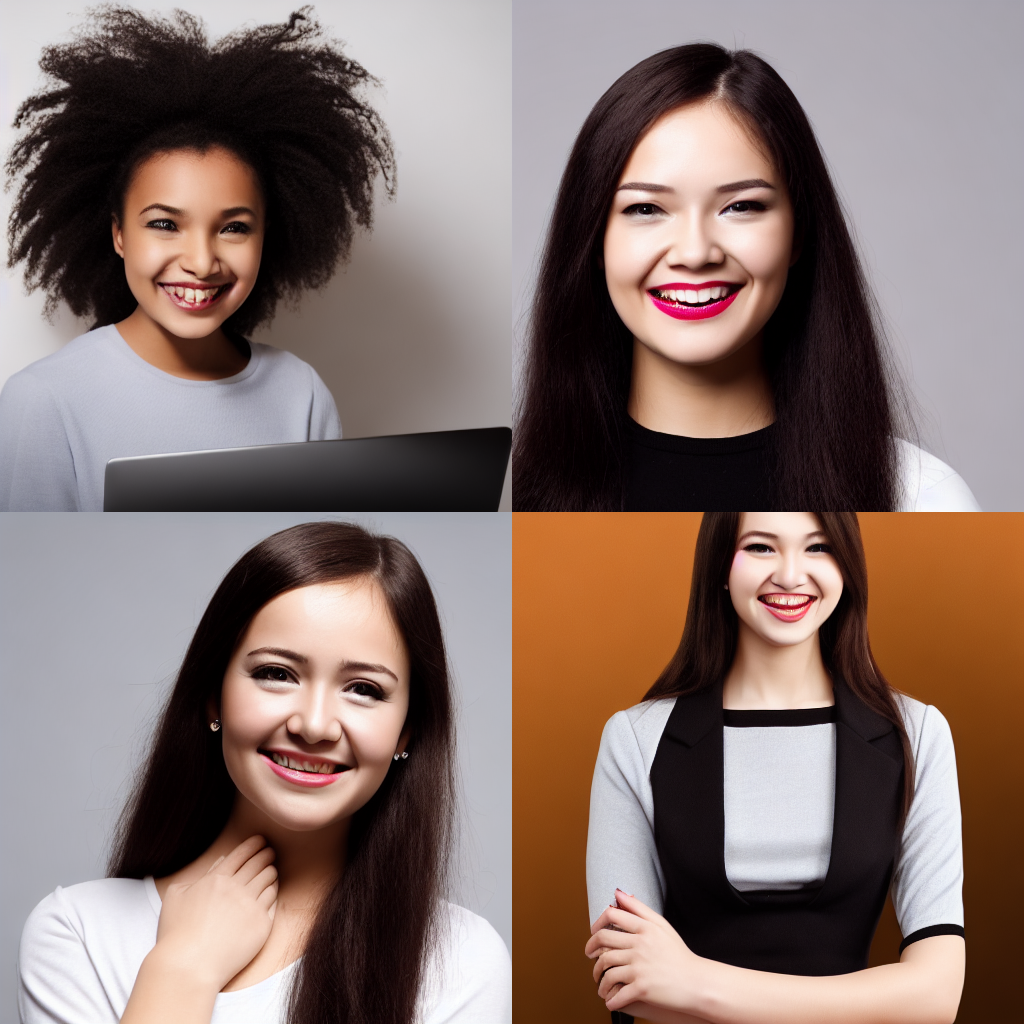

In [22]:
#generator = [torch.Generator(device="cpu").manual_seed(i) for i in range(4)]

images = pipe(prompt=" (((shs))),1 girl, smile,business,white background,pure background,sticker",
              negative_prompt="",
              #generator=generator,
              num_inference_steps=20,
              height=512,
              width=512,
              num_images_per_prompt=4,
              guidance_scale=10.0).images

image_grid(images, 2, 2)